In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from get_processed_data import get_processed_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [84]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 36) (12335,)
Validation set shape: (1542, 36) (1542,)
Test set shape: (1542, 36) (1542,)


In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_smote, y_smote = smote(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
# X_smote_scaled = scaler.transform(X_smote)
# X_over_scaled = scaler.transform(X_over)
# X_under_scaled = scaler.transform(X_under)

```No Sampling```

Lasso Coefficients: [-0.         -0.          0.         -0.          0.         -0.
  0.          0.          0.         -0.          0.         -0.
 -0.          0.02619655 -0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.          0.         -0.         -0.02691296  0.          0.00883222]
Accuracy: 0.9332036316472114
Confusion Matrix:
 [[1439    0]
 [ 103    0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


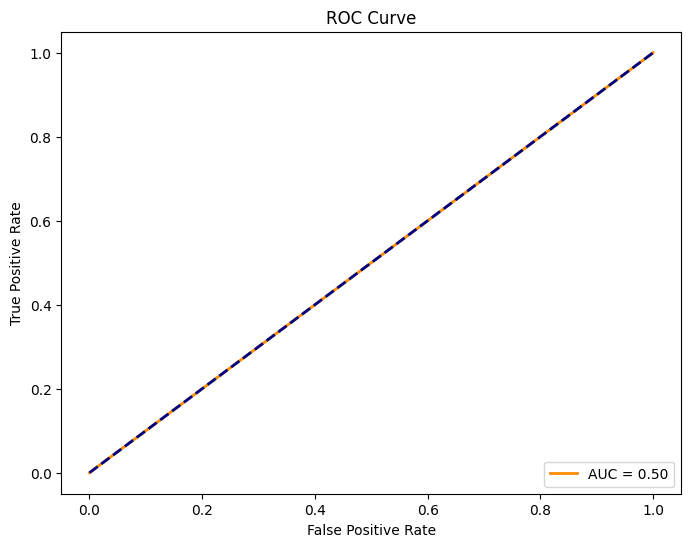

In [86]:
alpha_param = 0.01

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_train_scaled, y_train)

# Print the coefficients
print("Lasso Coefficients:", lasso_model.coef_)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```SMOTE```

Lasso Coefficients: [-0.01289269 -0.03018146 -0.0042707  -0.0174689  -0.01218346 -0.
 -0.00558139 -0.         -0.13863746 -0.09849303 -0.         -0.0160995
 -0.          0.12168152 -0.03056686 -0.03112081 -0.03683858 -0.0106291
 -0.00438536  0.00952175 -0.02517128 -0.00100818 -0.00207737 -0.02082457
 -0.0461159  -0.00463123 -0.01994279 -0.         -0.         -0.00559278
  0.02237607 -0.0165571  -0.03643906 -0.3279054  -0.18059842 -0.12777724]
Accuracy: 0.8430609597924773
Confusion Matrix:
 [[1261  178]
 [  64   39]]
Precision: 0.17972350230414746
Recall: 0.3786407766990291
F1 Score: 0.24374999999999997


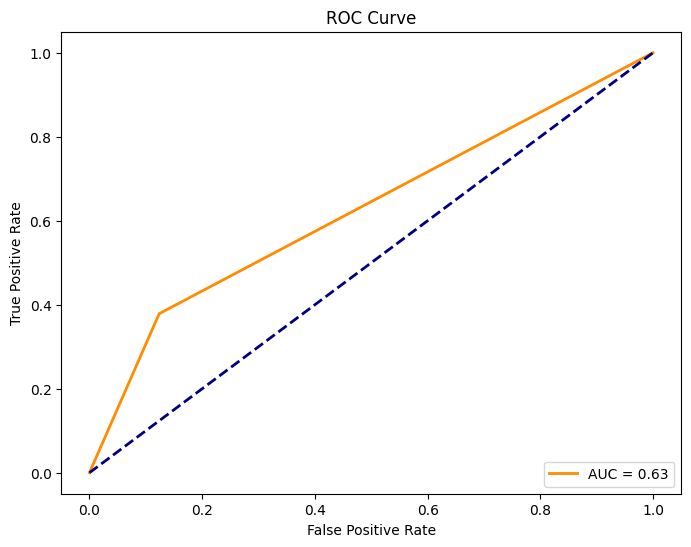

In [87]:
alpha_param = 0.01

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_smote_scaled, y_smote)

# Print the coefficients
print("Lasso Coefficients:", lasso_model.coef_)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```Over-Sampling```

Lasso Coefficients: [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -3.35941159e-03
  0.00000000e+00 -1.00637562e-02  0.00000000e+00  9.83703678e-03
 -0.00000000e+00  0.00000000e+00  4.05266790e-04 -0.00000000e+00
 -1.10557407e-02  1.92827337e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.93180724e-03 -0.00000000e+00  1.44006793e-02
 -0.00000000e+00 -6.91491483e-03 -7.13281873e-05 -0.00000000e+00
 -0.00000000e+00 -9.34010465e-03 -7.37400263e-04 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  3.75259428e-02 -0.00000000e+00
 -0.00000000e+00 -1.97879373e-01  0.00000000e+00  4.09324326e-02]
Accuracy: 0.6134889753566797
Confusion Matrix:
 [[850 589]
 [  7  96]]
Precision: 0.14014598540145987
Recall: 0.9320388349514563
F1 Score: 0.2436548223350254


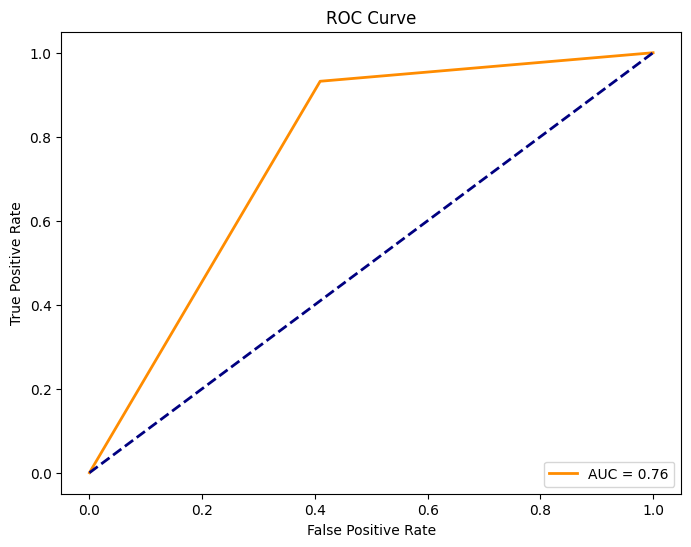

In [92]:
alpha_param = 0.01

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_over_scaled, y_over)


# Print the coefficients
print("Lasso Coefficients:", lasso_model.coef_)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```Undersampling```

Lasso Coefficients: [-0.         -0.          0.00356486 -0.00428183 -0.         -0.
  0.00493021  0.01215478 -0.          0.00299365  0.         -0.
 -0.00648103  0.19358405 -0.          0.         -0.          0.00815562
  0.          0.02599094 -0.         -0.0062898  -0.00158145 -0.00958836
 -0.01625101 -0.01674628  0.         -0.          0.         -0.
  0.03095806  0.          0.         -0.20142133  0.          0.03413686]
Accuracy: 0.6134889753566797
Confusion Matrix:
 [[850 589]
 [  7  96]]
Precision: 0.14014598540145987
Recall: 0.9320388349514563
F1 Score: 0.2436548223350254


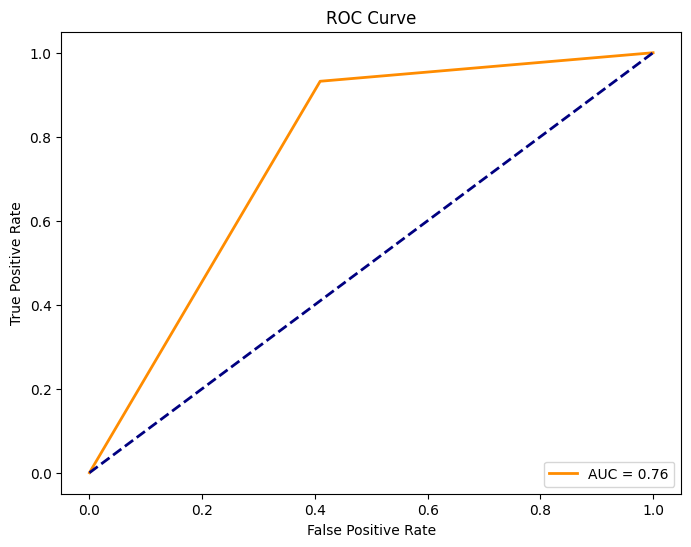

In [89]:
alpha_param = 0.01

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha_param)
lasso_model.fit(X_under_scaled, y_under)

# Print the coefficients
print("Lasso Coefficients:", lasso_model.coef_)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()